In [4]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

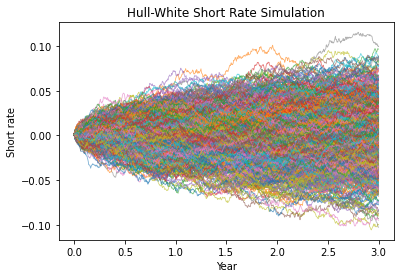

In [5]:
sigma = 0.02   # HW model sigma parameter
a = 0.04   # HW model a parameter
length = 3   # Simulation time (in years)
steps_per_year = 252   # daily basis
steps = length * steps_per_year
forward_rate = 0.0011   # forward rate
count = ql.Thirty360()
date = ql.Date(9, 5, 2022)

ql.Settings.instance().evaluationDate = date

quote_Handle = ql.QuoteHandle(ql.SimpleQuote(forward_rate))
spot_curve = ql.FlatForward(date, quote_Handle, count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rdm_gen = ql.UniformRandomGenerator()
rdm_seq = ql.UniformRandomSequenceGenerator(steps, rdm_gen)
rng = ql.GaussianRandomSequenceGenerator(rdm_seq)
seq = ql.GaussianPathGenerator(hw_process, length, steps, rng, False)

def paths(N):
    arr = np.zeros((N, steps + 1))
    for i in range(N):
        sample = seq.next()
        path = sample.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

N = 1000   # number of simulations
time, paths = paths(N)
rates = pd.DataFrame(paths).T
    

for i in range(N):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.ylabel('Short rate')
plt.xlabel('Year');
    
plt.savefig("HW_rates.pdf")
plt.show()